In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('fakeNewsNet.csv')

In [3]:
df

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1
...,...,...,...,...,...
23191,Pippa Middleton wedding: In case you missed it...,https://www.express.co.uk/news/royal/807049/pi...,www.express.co.uk,52,1
23192,Zayn Malik & Gigi Hadid’s Shocking Split: Why ...,hollywoodlife.com/2018/03/13/zayn-malik-gigi-h...,hollywoodlife.com,7,0
23193,Jessica Chastain Recalls the Moment Her Mother...,http://www.justjared.com/2018/01/17/jessica-ch...,www.justjared.com,26,1
23194,"Tristan Thompson Feels ""Dumped"" After Khloé Ka...",www.intouchweekly.com/posts/tristan-thompson-f...,www.intouchweekly.com,24,0


EXPLORATORY DATA ANALYSIS

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23196 entries, 0 to 23195
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          23196 non-null  object
 1   news_url       22866 non-null  object
 2   source_domain  22866 non-null  object
 3   tweet_num      23196 non-null  int64 
 4   real           23196 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 906.2+ KB


In [5]:
df.shape

(23196, 5)

In [6]:
df['real'].value_counts()

real
1    17441
0     5755
Name: count, dtype: int64

In [7]:
df.describe()

,tweet_num,real
count,23196.000000,23196.000000
mean,88.956803,0.751897
std,488.694592,0.431921
min,0.000000,0.000000
25%,11.000000,1.000000
50%,37.000000,1.000000
75%,65.000000,1.000000
max,29060.000000,1.000000


In [8]:
df.head()

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


DATA CLEANING

In [9]:
df = df.filter(['title', 'real'], axis=1)

In [10]:
df['title'] = df['title'].str.lower().str.strip()

In [11]:
df.head()

,title,real
0,kandi burruss explodes over rape accusation on...,1
1,people's choice awards 2018: the best red carp...,1
2,sophia bush sends sweet birthday message to 'o...,1
3,colombian singer maluma sparks rumours of inap...,1
4,gossip girl 10 years later: how upper east sid...,1


In [12]:
df.isnull().sum().sum()

np.int64(0)

In [13]:
df['title'] = df['title'].str.replace('?', '', regex=False)
df['title'] = df['title'].str.replace('.', '', regex=False)
df['title'] = df['title'].str.replace('-', ' ', regex=False)
df['title'] = df['title'].str.replace(',', '', regex=False)
df['title'] = df['title'].str.replace("'", '', regex=False)
df['title'] = df['title'].str.replace(":", '', regex=False)
df['title'] = df['title'].str.replace('"', '', regex=False)
df['title'] = df['title'].str.replace("&", '', regex=False)

In [14]:
df

,title,real
0,kandi burruss explodes over rape accusation on...,1
1,peoples choice awards 2018 the best red carpet...,1
2,sophia bush sends sweet birthday message to on...,1
3,colombian singer maluma sparks rumours of inap...,1
4,gossip girl 10 years later how upper east side...,1
...,...,...
23191,pippa middleton wedding in case you missed itp...,1
23192,zayn malik gigi hadid’s shocking split why th...,0
23193,jessica chastain recalls the moment her mother...,1
23194,tristan thompson feels dumped after khloé kard...,0


<function matplotlib.pyplot.show(close=None, block=None)>

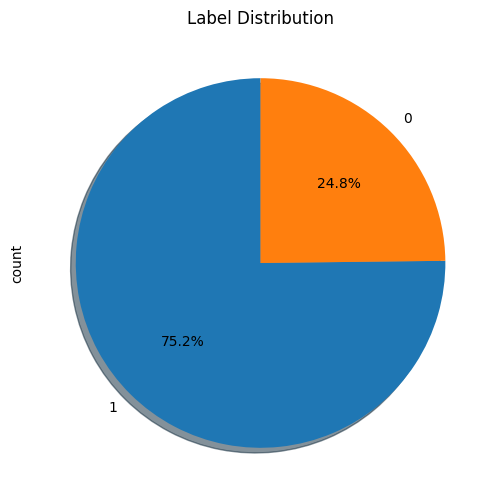

In [15]:
import matplotlib.pyplot as plt


label_counts = df['real'].value_counts()


plt.figure(figsize=(6, 6))
label_counts.plot.pie(autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Label Distribution')
plt.show

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [17]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english', max_df=0.7)
X = vectorizer.fit_transform(df['title'])

y = df['real']

In [18]:
df

,title,real
0,kandi burruss explodes over rape accusation on...,1
1,peoples choice awards 2018 the best red carpet...,1
2,sophia bush sends sweet birthday message to on...,1
3,colombian singer maluma sparks rumours of inap...,1
4,gossip girl 10 years later how upper east side...,1
...,...,...
23191,pippa middleton wedding in case you missed itp...,1
23192,zayn malik gigi hadid’s shocking split why th...,0
23193,jessica chastain recalls the moment her mother...,1
23194,tristan thompson feels dumped after khloé kard...,0


In [20]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [21]:
X = X_resampled
y = y_resampled

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [23]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
model.score(X_train, y_train)

0.9960938899838738

MODEL PERFORMANCE EVALUATION

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay

In [26]:
y_pred = model.predict(X_test)

In [27]:
acc = accuracy_score(y_test, y_pred)
acc

0.8593951555109646

In [28]:
prec = precision_score(y_test, y_pred)
prec

0.8544534981736442

In [29]:
rec = recall_score(y_test, y_pred)
rec

0.867865296803653

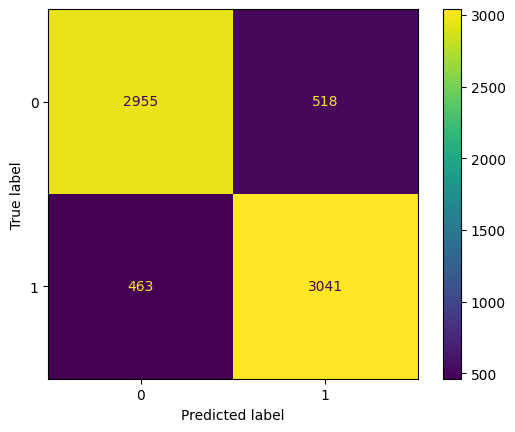

In [30]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

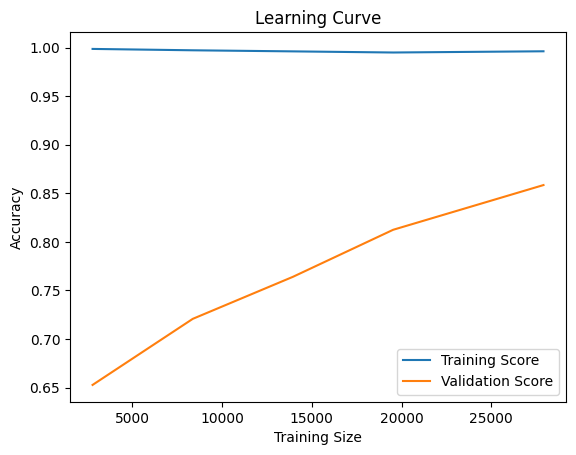

In [36]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, train_sizes=[0.1, 0.3, 0.5, 0.7, 1.0]
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label="Training Score")
plt.plot(train_sizes, test_mean, label="Validation Score")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Learning Curve")
plt.show()

In [31]:
import joblib

In [34]:
joblib.dump(model, 'DTFN_model.joblib')

['DTFN_model.joblib']

In [33]:
joblib.dump(vectorizer, 'DTFN_vectorizer.joblib')

['DTFN_vectorizer.joblib']